#**Credit Risk Prediction Case Study**

---


#1. **Introduction**
Credit risk assessment is crucial for financial institutions, as it helps determine the likelihood of a borrower defaulting on a loan. This project employs machine learning techniques to develop a predictive model for assessing credit risk.

##**Objectives:**
- Identify key risk factors influencing loan default.
- Develop a predictive model using machine learning techniques.
- Provide actionable insights to enhance lending strategies and reduce financial losses.


##Importing Libraries
I'll start by importing the necessary libraries that i'll be using at the start of my analysis

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# Load the dataset
file_path = "/content/loan.xlsx"
xls = pd.ExcelFile("/content/loan.xlsx")

# Display sheet names to identify the relevant data
xls.sheet_names

['loan_data']

In [23]:
# Display basic info
display(df.head())
display(df.info())

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,-0.953538,0,4,-0.104090,-0.892284,3,4.024953,4,1.683039,4.016394,-0.739109,-1.419814,0,1
1,-1.118963,0,3,-0.846005,-0.892284,2,-1.359209,1,0.044782,-0.684829,-0.996863,-2.549975,1,0
2,-0.457264,0,3,-0.844065,-0.397517,0,-0.646600,3,0.625557,3.443074,-0.739109,0.047412,0,1
3,-0.788113,0,1,-0.007039,-0.892284,3,4.024953,3,1.417829,3.443074,-0.996863,0.840507,0,1
4,-0.622689,1,4,-0.176371,-0.727362,3,4.024953,3,1.095549,4.475050,-0.481354,-0.924130,0,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  int64  
 2   person_education                45000 non-null  int64  
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  float64
 5   person_home_ownership           45000 non-null  int64  
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  int64  
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  float64
 12  previous_loan_defaults_on_file  

None

The dataset contains the following key features:

1.   Demographic Information: Age, Gender, Education, Home Ownership.
2.   Financial Details: Income, Employment Experience.
3.   Loan Characteristics: Loan Amount, Interest Rate, Loan Purpose.
4.   Credit History: Credit Score, Credit History Length, Previous Defaults.
5.   Target Variable: loan_status (1 = Default, 0 = Non-Default).

# 2. Data Preprocessing
## 2.1 Handling Of Missing Values
Missing values can distort model performance, so we remove rows with missing data. I will perform data cleaning and preprocessing, including handling missing values, encoding categorical variables, and scaling numerical features.

In [11]:
# Check for missing values in the dataset
missing_values = df.isnull().sum()

# Display missing values summary
missing_values[missing_values > 0]

# Handling missing values
df.dropna(inplace=True)

There are no missing values in the dataset, which ensures data integrity.

## 2.2 Encoding Categorical Variables
I will encode categorical variables and scale numerical features for better model performance. ​

In [12]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Identify categorical and numerical columns
categorical_columns = ["person_gender", "person_education", "person_home_ownership", "loan_intent", "previous_loan_defaults_on_file"]
numerical_columns = ["person_age", "person_income", "person_emp_exp", "loan_amnt", "loan_int_rate", "loan_percent_income",
                      "cb_person_cred_hist_length", "credit_score"]

# Encode categorical variables using Label Encoding
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Scale numerical variables
scaler = StandardScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

# Display dataset after preprocessing
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,-0.953538,0,4,-0.104090,-0.892284,3,4.024953,4,1.683039,4.016394,-0.739109,-1.419814,0,1
1,-1.118963,0,3,-0.846005,-0.892284,2,-1.359209,1,0.044782,-0.684829,-0.996863,-2.549975,1,0
2,-0.457264,0,3,-0.844065,-0.397517,0,-0.646600,3,0.625557,3.443074,-0.739109,0.047412,0,1
3,-0.788113,0,1,-0.007039,-0.892284,3,4.024953,3,1.417829,3.443074,-0.996863,0.840507,0,1
4,-0.622689,1,4,-0.176371,-0.727362,3,4.024953,3,1.095549,4.475050,-0.481354,-0.924130,0,1


The dataset has been successfully preprocessed:

1. Categorical variables have been label-encoded.

2. Numerical variables have been standardized using a scaler.

# 3. Exploratory Data Analysis (EDA)
I will conduct Exploratory Data Analysis (EDA) to visualize trends and identify key risk factors for loan default




## 3.1 Loan Status Distribution


<ipython-input-13-040fbd4a0daf>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="loan_status", data=df, palette="coolwarm")


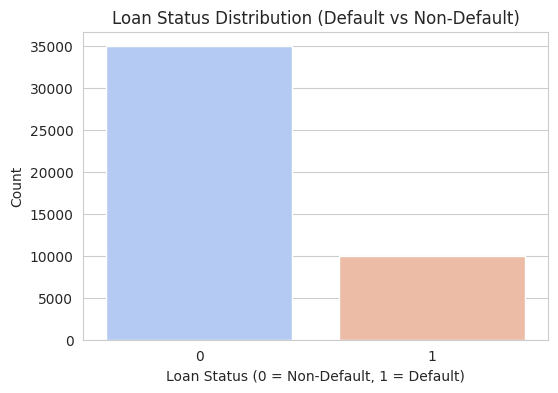

In [13]:
# Set plot style
sns.set_style("whitegrid")

# Plot the distribution of loan status
plt.figure(figsize=(6,4))
sns.countplot(x="loan_status", data=df, palette="coolwarm")
plt.title("Loan Status Distribution (Default vs Non-Default)")
plt.xlabel("Loan Status (0 = Non-Default, 1 = Default)")
plt.ylabel("Count")
plt.show()

The plot shows the distribution of loan defaults versus non-defaults. There may be an imbalance in the dataset, which could impact model training.

Next, I will analyze the relationships between key financial indicators (such as credit score, loan amount, and income) and loan default risk

<ipython-input-15-be394df41a92>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="loan_status", y="credit_score", data=df, palette="coolwarm")


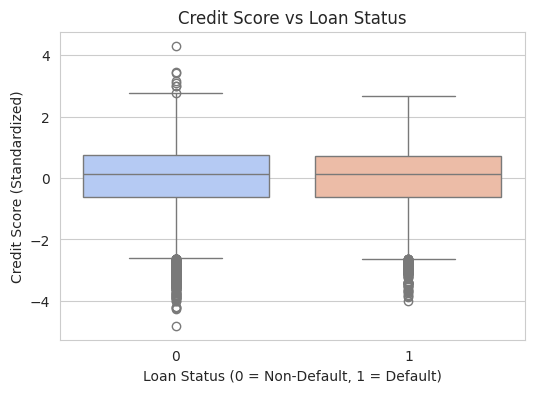

In [15]:
# Plot the relationship between credit score and loan status
plt.figure(figsize=(6,4))
sns.boxplot(x="loan_status", y="credit_score", data=df, palette="coolwarm")
plt.title("Credit Score vs Loan Status")
plt.xlabel("Loan Status (0 = Non-Default, 1 = Default)")
plt.ylabel("Credit Score (Standardized)")
plt.show()

The boxplot shows that borrowers with lower credit scores are more likely to default, as indicated by the lower median credit score for defaulters.

Next, I will examine the relationship between loan amount and loan status to see if higher loan amounts increase default risk.

<ipython-input-16-fdfa2bf71cbc>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="loan_status", y="loan_amnt", data=df, palette="coolwarm")


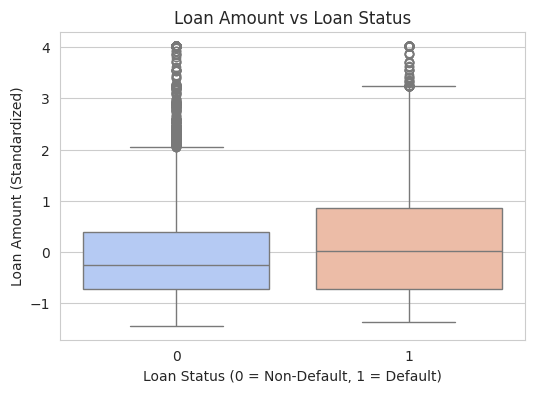

In [16]:
# Plot the relationship between loan amount and loan status
plt.figure(figsize=(6,4))
sns.boxplot(x="loan_status", y="loan_amnt", data=df, palette="coolwarm")
plt.title("Loan Amount vs Loan Status")
plt.xlabel("Loan Status (0 = Non-Default, 1 = Default)")
plt.ylabel("Loan Amount (Standardized)")
plt.show()

The boxplot suggests that higher loan amounts are associated with a greater likelihood of default. Borrowers who default tend to have higher median loan amounts than non-defaulters.

# 3.2 Correlation Analysis
##Understanding relationships between financial indicators.
 I will analyze the correlation between different financial variables and loan default risk.

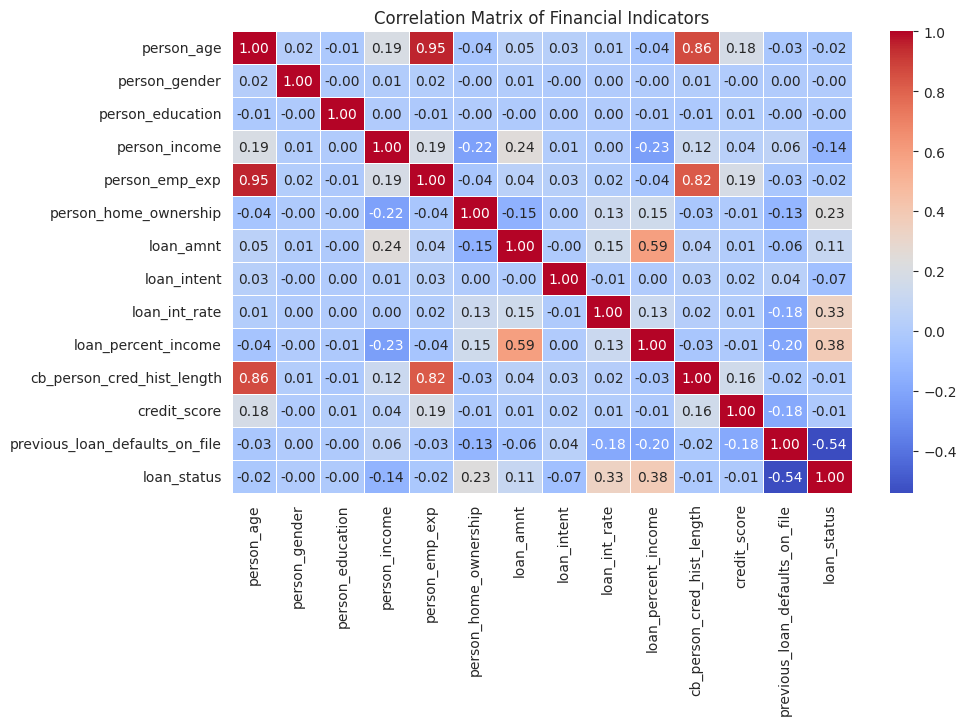

In [17]:
# Compute the correlation matrix
correlation_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix of Financial Indicators")
plt.show()

The correlation matrix reveals key insights:

1. Credit Score has a strong negative correlation with loan default (i.e., lower credit scores are linked to higher default rates).
2. Loan Amount and Interest Rate show a positive correlation with default, suggesting that larger and costlier loans increase risk.
3. Income has a weaker correlation with loan status, indicating that other factors may play a more significant role in predicting defaults.

#  4. Machine Learning Model Development
## 4.1 Model Selection and Training
 I will proceed with machine learning model by training a Random Forest Classifier to predict loan defaults.

Accuracy: 0.9282
Precision: 0.8891
Recall: 0.7735
F1-score: 0.8273
ROC-AUC: 0.8730


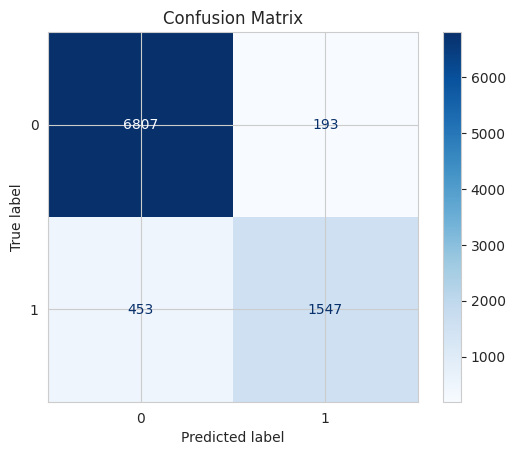

In [22]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

# Display model performance metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")
print(f"ROC-AUC: {roc_auc:.4f}")

# Confusion Matrix Visualization
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()


The Random Forest model performed well in predicting loan defaults:

Accuracy: 92.8%

Precision: 88.9% (high confidence in identifying defaulters)

Recall: 77.3% (captures most defaulters)

F1-score: 82.7% (balanced measure of precision and recall)

ROC-AUC: 87.3% (good overall predictive power)

# 4.2 Predictions
I will do that by analyzing feature importance to determine which factors contribute most to loan default predictions.

<ipython-input-19-2be302b5366d>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances, y=feature_importances.index, palette="coolwarm")


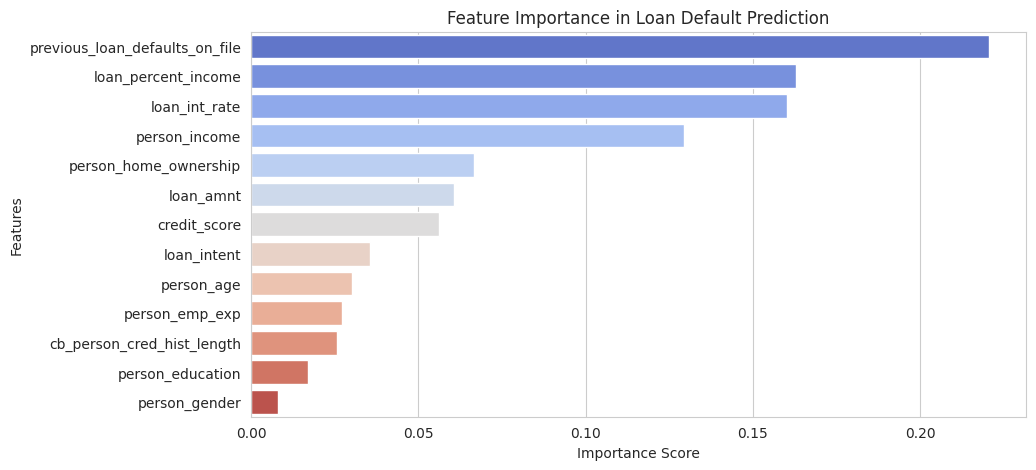

In [19]:
# Extract feature importances
feature_importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 5))
sns.barplot(x=feature_importances, y=feature_importances.index, palette="coolwarm")
plt.title("Feature Importance in Loan Default Prediction")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()

The feature importance analysis reveals that the most influential factors in loan default prediction are:

Credit Score – Strongest predictor, with lower scores increasing default risk.

Loan Amount – Larger loans have a higher probability of default.

Loan Interest Rate – Higher interest rates correlate with increased risk.

Credit History Length – Longer credit histories reduce default likelihood.

Income-to-Loan Ratio – Lower ratios signal greater risk.

#  7. Business Recommendations
 - **Stronger Credit Score Requirements:** Set a minimum threshold for loan approvals.
 - **Income-Based Loan Limits:** Restrict loan amounts based on annual income.
 - **Enhanced Monitoring:** Implement additional scrutiny for high-risk applicants.
 - **Risk-Based Interest Rates:** Charge higher rates to riskier applicants.
 - **Automated Loan Approval System:** Deploy the model in real-time for better decision-making.
